In [1]:
"""
tournaments.ipynb

Jupyter Notebook to perform analysis on card market data.

Author: Casey Forey
Date Created: 4/7/24
"""

'\ntournaments.ipynb\n\nJupyter Notebook to perform analysis on card market data.\n\nAuthor: Casey Forey\nDate Created: 4/7/24\n'

In [2]:
# Imports
import json 
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import src.load.load_tournament_data as ltd
import src.plot.plot_tournament_data as ptd

In [3]:
# Constants
DATA_DIRECTORY: str = 'data/'

In [4]:
path = 'data/AtomicCards.json' 
f = open(path, encoding= "utf8") 
atm_cards = json.load(f)

path = 'data/AllPrintings.json' 
f = open(path, encoding= "utf8") 
all_cards = json.load(f)

path = 'data/AllPricesToday.json' 
f = open(path) 
prices = json.load(f)

path = 'data/SetList.json' 
f = open(path, encoding= "utf8") 
set_list = json.load(f)

## Modern Data

In [5]:
base_path: str = os.path.join(DATA_DIRECTORY, '2023')
modern_card_counts_df: pd.DataFrame = ltd.load_format_card_counts(base_path, 'modern')
modern_card_counts_df

['data/2023\\01\\01\\modern-challenge-2023-01-0112504296.json', 'data/2023\\01\\02\\modern-preliminary-2023-01-0212504305.json', 'data/2023\\01\\02\\modern-preliminary-2023-01-0212504308.json', 'data/2023\\01\\03\\modern-league-2023-01-03.json', 'data/2023\\01\\03\\modern-preliminary-2023-01-0312504312.json', 'data/2023\\01\\03\\modern-preliminary-2023-01-0312504315.json', 'data/2023\\01\\04\\modern-preliminary-2023-01-0412508211.json', 'data/2023\\01\\05\\modern-preliminary-2023-01-0512508214.json', 'data/2023\\01\\05\\modern-preliminary-2023-01-0512508217.json', 'data/2023\\01\\05\\modern-preliminary-2023-01-0512508221.json', 'data/2023\\01\\06\\modern-league-2023-01-06.json', 'data/2023\\01\\06\\modern-preliminary-2023-01-0612508225.json', 'data/2023\\01\\06\\modern-preliminary-2023-01-0612508231.json', 'data/2023\\01\\07\\modern-showcase-challenge-2023-01-0712508208.json', 'data/2023\\01\\08\\modern-challenge-2023-01-0812508243.json', 'data/2023\\01\\09\\modern-preliminary-2023-01-

,Card Name,Total Count
0,Lord of Atlantis,727
1,Aether Vial,2000
2,"Minamo, School at Water's Edge",497
3,Mutavault,1314
4,Cavern of Souls,3243
...,...,...
2422,Infinite Obliteration,1
2423,Beyeen Veil,4
2424,Umara Wizard,4
2425,Mind Grind,1


In [6]:
data = atm_cards['data']
cards_set = {}
i = 0
for card in data:
    card_info = data[card][0]
    if 'firstPrinting' in card_info:
        cards_set[card] = card_info['firstPrinting']
    else:
        i +=1
print(i)

42


In [7]:
cards_set_df = pd.DataFrame.from_dict(cards_set, orient='index')
cards_set_df.reset_index(inplace= True) 
cards_set_df.rename(columns={'index': 'Card Name', 0:'Set Name'},inplace= True) 
cards_set_df

,Card Name,Set Name
0,"""Ach! Hans, Run!""",UNH
1,"""Brims"" Barone, Midway Mobster",UNF
2,"""Lifetime"" Pass Holder",UNF
3,"""Name Sticker"" Goblin",UNF
4,"""Rumors of My Death . . .""",UST
...,...,...
28629,"Éomer, King of Rohan",LTC
28630,"Éomer, Marshal of Rohan",LTR
28631,"Éowyn, Fearless Knight",LTR
28632,"Éowyn, Lady of Rohan",LTR


In [8]:
def add_back_face(df):
    for card in df['Card Name']:
        for name in cards_set_df['Card Name']:
            front_name = name.split('//')[0].strip()
            if card == front_name and '//' in name:
                df['Card Name'].replace(card, name,inplace = True)
    return df

In [9]:
modern_card_counts_df = add_back_face(modern_card_counts_df)
modern_card_counts_df

,Card Name,Total Count
0,Steelshaper's Gift,481
1,Puresteel Paladin,2997
2,Stoneforge Mystic,4271
3,Plains,8903
4,Marsh Flats,5157
...,...,...
2463,Inferno Titan,1
2464,Infinite Obliteration,1
2465,Beyeen Veil // Beyeen Coast,4
2466,Umara Wizard // Umara Skyfalls,4


In [10]:
# Checking to see if double face cards look correct
for name in modern_card_counts_df['Card Name']:
    if "Beyeen" in name:
        print(name)

Beyeen Veil // Beyeen Coast


In [11]:
modern_card_counts_df = modern_card_counts_df.merge(cards_set_df, on = 'Card Name', how = 'left')
modern_card_counts_df

,Card Name,Total Count,Set Name
0,Steelshaper's Gift,481,5DN
1,Puresteel Paladin,2997,NPH
2,Stoneforge Mystic,4271,WWK
3,Plains,8903,LEA
4,Marsh Flats,5157,ZEN
...,...,...,...
2463,Inferno Titan,1,M11
2464,Infinite Obliteration,1,ORI
2465,Beyeen Veil // Beyeen Coast,4,ZNR
2466,Umara Wizard // Umara Skyfalls,4,ZNR


In [12]:
set_year = {}
for set_id in set_list['data']:
    set_year[set_id['code']] = set_id['releaseDate'][0:4]
set_year_df = pd.DataFrame.from_dict(set_year, orient='index')
set_year_df.reset_index(inplace= True) 
set_year_df.rename(columns={'index': 'Set Name', 0:'Release Year'},inplace= True) 
set_year_df

,Set Name,Release Year
0,P15A,2008
1,PHTR,2017
2,G17,2017
3,PH17,2018
4,PH18,2019
...,...,...
741,ZNC,2020
742,ZNE,2020
743,MZNR,2020
744,PZNR,2020


In [13]:
modern_card_counts_df = modern_card_counts_df.merge(set_year_df, on = 'Set Name', how = 'left', copy = True)
modern_card_counts_df

,Card Name,Total Count,Set Name,Release Year
0,Lord of Atlantis,727,LEA,1993
1,Aether Vial,2000,DST,2004
2,"Minamo, School at Water's Edge",497,CHK,2004
3,Mutavault,1314,MOR,2008
4,Cavern of Souls,3243,AVR,2012
...,...,...,...,...
2422,Infinite Obliteration,1,ORI,2015
2465,Beyeen Veil // Beyeen Coast,4,ZNR,2020
2466,Umara Wizard // Umara Skyfalls,4,ZNR,2020
2425,Mind Grind,1,GTC,2013


<Axes: xlabel='Release Year'>

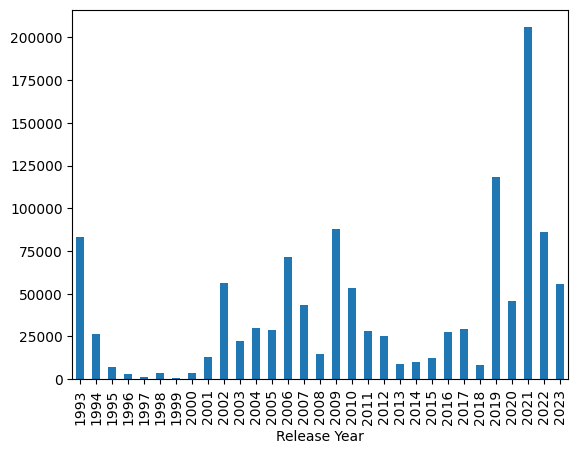

In [14]:
# Very limited Graph as a proof of concept
modern_card_counts_df.groupby('Release Year')['Total Count'].sum().plot(kind = 'bar')

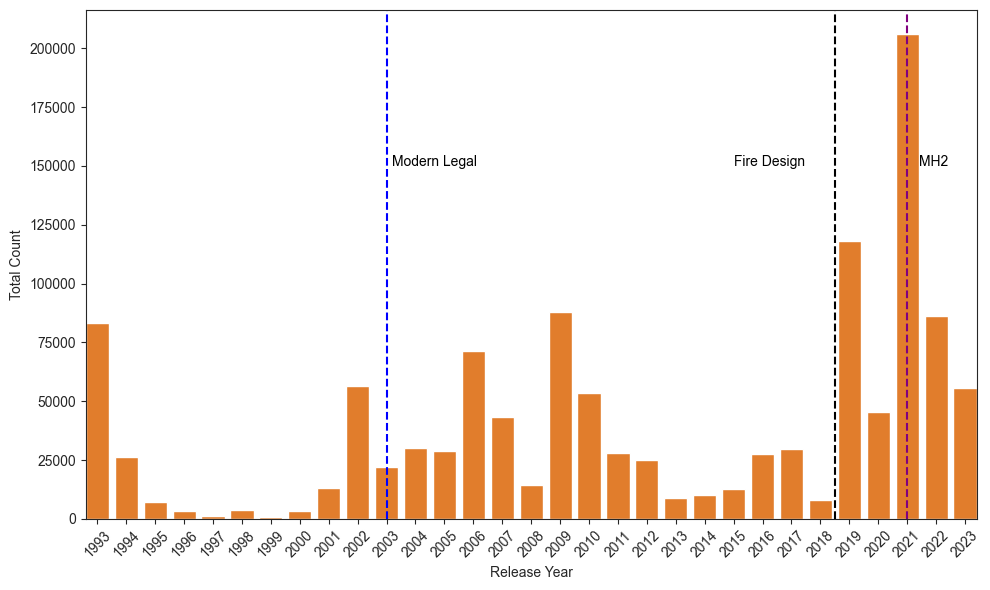

In [46]:
plt = ptd.create_base_graph(modern_card_counts_df,(255/255,122/255,14/255))
plt.axvline(x=10.0, color='blue', linestyle='--')
plt.text(10.2, 150000, 'Modern Legal', color = 'black', fontsize = 10)
plt.axvline(x=25.5, color='black', linestyle='--')
plt.text(22, 150000, 'Fire Design', color = 'black', fontsize = 10)
plt.axvline(x=28, color='purple', linestyle='--')
plt.text(28.4, 150000, 'MH2', color = 'black', fontsize = 10)
plt.margins(x=0)

### Pioneer Data

In [18]:
base_path: str = os.path.join(DATA_DIRECTORY, '2023')
pioneer_card_counts_df: pd.DataFrame = ltd.load_format_card_counts(base_path, 'pioneer')
pioneer_card_counts_df

['data/2023\\01\\01\\pioneer-challenge-2023-01-0112504297.json', 'data/2023\\01\\02\\pioneer-league-2023-01-02.json', 'data/2023\\01\\02\\pioneer-preliminary-2023-01-0212504310.json', 'data/2023\\01\\03\\pioneer-preliminary-2023-01-0312504313.json', 'data/2023\\01\\03\\pioneer-preliminary-2023-01-0312504316.json', 'data/2023\\01\\04\\pioneer-preliminary-2023-01-0412508210.json', 'data/2023\\01\\05\\pioneer-league-2023-01-05.json', 'data/2023\\01\\05\\pioneer-preliminary-2023-01-0512508222.json', 'data/2023\\01\\06\\pioneer-preliminary-2023-01-0612508229.json', 'data/2023\\01\\07\\pioneer-challenge-2023-01-0712508239.json', 'data/2023\\01\\07\\pioneer-preliminary-2023-01-0712508232.json', 'data/2023\\01\\08\\pioneer-showcase-challenge-2023-01-0812508209.json', 'data/2023\\01\\09\\pioneer-league-2023-01-09.json', 'data/2023\\01\\09\\pioneer-preliminary-2023-01-0912508256.json', 'data/2023\\01\\10\\pioneer-preliminary-2023-01-1012508259.json', 'data/2023\\01\\10\\pioneer-preliminary-2023-

,Card Name,Total Count
0,Wolfwillow Haven,3986
1,"Karn, the Great Creator",4278
2,"Boseiju, Who Endures",6276
3,Forest,13905
4,Lair of the Hydra,3411
...,...,...
2146,"Athreos, God of Passage",1
2147,Queen's Bay Paladin,1
2148,"Trelasarra, Moon Dancer",2
2149,Bag of Holding,1


In [19]:
pioneer_card_counts_df = add_back_face(pioneer_card_counts_df)
pioneer_card_counts_df

,Card Name,Total Count
0,Wolfwillow Haven,3986
1,"Karn, the Great Creator",4278
2,"Boseiju, Who Endures",6276
3,Forest,13905
4,Lair of the Hydra,3411
...,...,...
2146,"Athreos, God of Passage",1
2147,Queen's Bay Paladin,1
2148,"Trelasarra, Moon Dancer",2
2149,Bag of Holding,1


In [20]:
for name in pioneer_card_counts_df['Card Name']:
    if "Fable" in name:
        print(name)

Fable of the Mirror-Breaker // Reflection of Kiki-Jiki
Fabled Passage
Banish into Fable


In [21]:
pioneer_card_counts_df = pioneer_card_counts_df.merge(cards_set_df, on = 'Card Name', how = 'left')
pioneer_card_counts_df

,Card Name,Total Count,Set Name
0,Wolfwillow Haven,3986,THB
1,"Karn, the Great Creator",4278,WAR
2,"Boseiju, Who Endures",6276,NEO
3,Forest,13905,LEA
4,Lair of the Hydra,3411,AFR
...,...,...,...
2146,"Athreos, God of Passage",1,JOU
2147,Queen's Bay Paladin,1,LCI
2148,"Trelasarra, Moon Dancer",2,AFR
2149,Bag of Holding,1,M20


In [22]:
pioneer_card_counts_df = pioneer_card_counts_df.merge(set_year_df, on = 'Set Name', how = 'left', copy = True)
pioneer_card_counts_df

,Card Name,Total Count,Set Name,Release Year
0,Wolfwillow Haven,3986,THB,2020
1,"Karn, the Great Creator",4278,WAR,2019
2,"Boseiju, Who Endures",6276,NEO,2022
3,Forest,13905,LEA,1993
4,Lair of the Hydra,3411,AFR,2021
...,...,...,...,...
2146,"Athreos, God of Passage",1,JOU,2014
2147,Queen's Bay Paladin,1,LCI,2023
2148,"Trelasarra, Moon Dancer",2,AFR,2021
2149,Bag of Holding,1,M20,2019


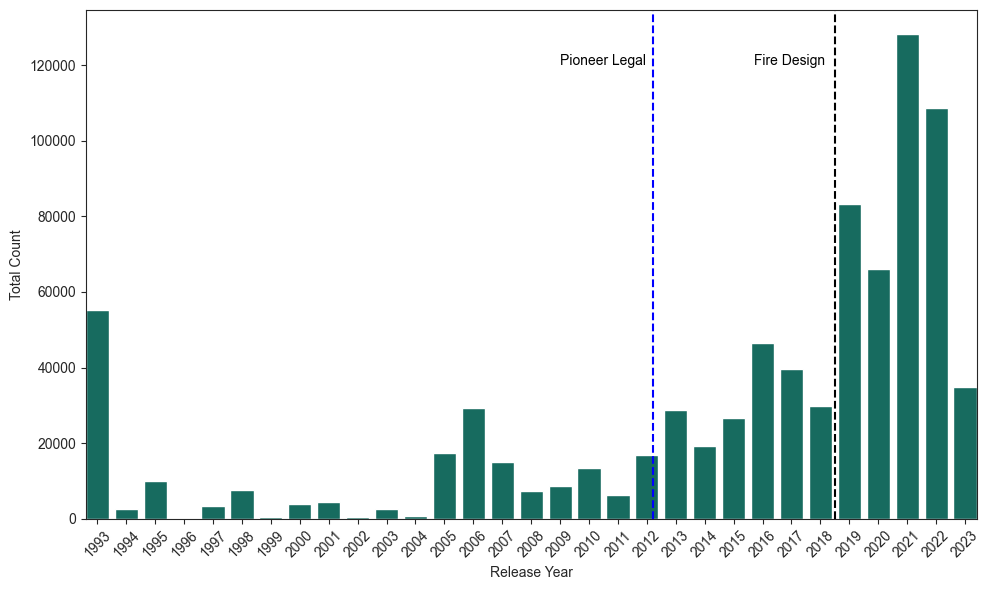

In [34]:
plt = ptd.create_base_graph(pioneer_card_counts_df, (9/255, 121/255, 105/255))
plt.axvline(x=19.2, color='blue', linestyle='--')
plt.text(16, 120000, 'Pioneer Legal', color = 'black', fontsize = 10)
plt.axvline(x=25.5, color='black', linestyle='--')
plt.text(22.7, 120000, 'Fire Design', color = 'black', fontsize = 10)
plt.show()

## Legacy

In [35]:
base_path: str = os.path.join(DATA_DIRECTORY, '2023')
legacy_card_counts_df: pd.DataFrame = ltd.load_format_card_counts(base_path, 'legacy')
legacy_card_counts_df

['data/2023\\01\\01\\legacy-challenge-2023-01-0112504298.json', 'data/2023\\01\\02\\legacy-preliminary-2023-01-0212504307.json', 'data/2023\\01\\03\\legacy-preliminary-2023-01-0312504318.json', 'data/2023\\01\\04\\legacy-preliminary-2023-01-0412504320.json', 'data/2023\\01\\05\\legacy-preliminary-2023-01-0512508219.json', 'data/2023\\01\\06\\legacy-preliminary-2023-01-0612508226.json', 'data/2023\\01\\07\\legacy-challenge-32-2023-01-0712508235.json', 'data/2023\\01\\07\\legacy-league-2023-01-07.json', 'data/2023\\01\\08\\legacy-challenge-2023-01-0812508244.json', 'data/2023\\01\\09\\legacy-preliminary-2023-01-0912508253.json', 'data/2023\\01\\10\\legacy-preliminary-2023-01-1012508264.json', 'data/2023\\01\\12\\legacy-preliminary-2023-01-1212509937.json', 'data/2023\\01\\13\\legacy-preliminary-2023-01-1312509944.json', 'data/2023\\01\\14\\legacy-challenge-32-2023-01-1412509953.json', 'data/2023\\01\\14\\legacy-league-2023-01-14.json', 'data/2023\\01\\15\\legacy-showcase-challenge-2023-0

,Card Name,Total Count
0,Fable of the Mirror-Breaker,2747
1,Red Elemental Blast,1901
2,Lightning Bolt,4551
3,"Sokenzan, Crucible of Defiance",301
4,Grindstone,740
...,...,...
1805,Moonsilver Key,2
1806,Chimney Rabble,1
1807,Riders of Rohan,2
1808,Summoning Trap,2


In [36]:
legacy_card_counts_df = add_back_face(legacy_card_counts_df)
legacy_card_counts_df

,Card Name,Total Count
0,Fable of the Mirror-Breaker // Reflection of K...,2747
1,Red Elemental Blast,1901
2,Lightning Bolt,4551
3,"Sokenzan, Crucible of Defiance",301
4,Grindstone,740
...,...,...
1805,Moonsilver Key,2
1806,Chimney Rabble,1
1807,Riders of Rohan,2
1808,Summoning Trap,2


In [37]:
for name in legacy_card_counts_df['Card Name']:
    if "Fable" in name:
        print(name)

Fable of the Mirror-Breaker // Reflection of Kiki-Jiki


In [38]:
legacy_card_counts_df = legacy_card_counts_df.merge(cards_set_df, on = 'Card Name', how = 'left')
legacy_card_counts_df

,Card Name,Total Count,Set Name
0,Fable of the Mirror-Breaker // Reflection of K...,2747,NEO
1,Red Elemental Blast,1901,LEA
2,Lightning Bolt,4551,LEA
3,"Sokenzan, Crucible of Defiance",301,NEO
4,Grindstone,740,TMP
...,...,...,...
1805,Moonsilver Key,2,MID
1806,Chimney Rabble,1,ONE
1807,Riders of Rohan,2,LTC
1808,Summoning Trap,2,ZEN


In [39]:
legacy_card_counts_df = legacy_card_counts_df.merge(set_year_df, on = 'Set Name', how = 'left', copy = True)
legacy_card_counts_df

,Card Name,Total Count,Set Name,Release Year
0,Fable of the Mirror-Breaker // Reflection of K...,2747,NEO,2022
1,Red Elemental Blast,1901,LEA,1993
2,Lightning Bolt,4551,LEA,1993
3,"Sokenzan, Crucible of Defiance",301,NEO,2022
4,Grindstone,740,TMP,1997
...,...,...,...,...
1805,Moonsilver Key,2,MID,2021
1806,Chimney Rabble,1,ONE,2023
1807,Riders of Rohan,2,LTC,2023
1808,Summoning Trap,2,ZEN,2009


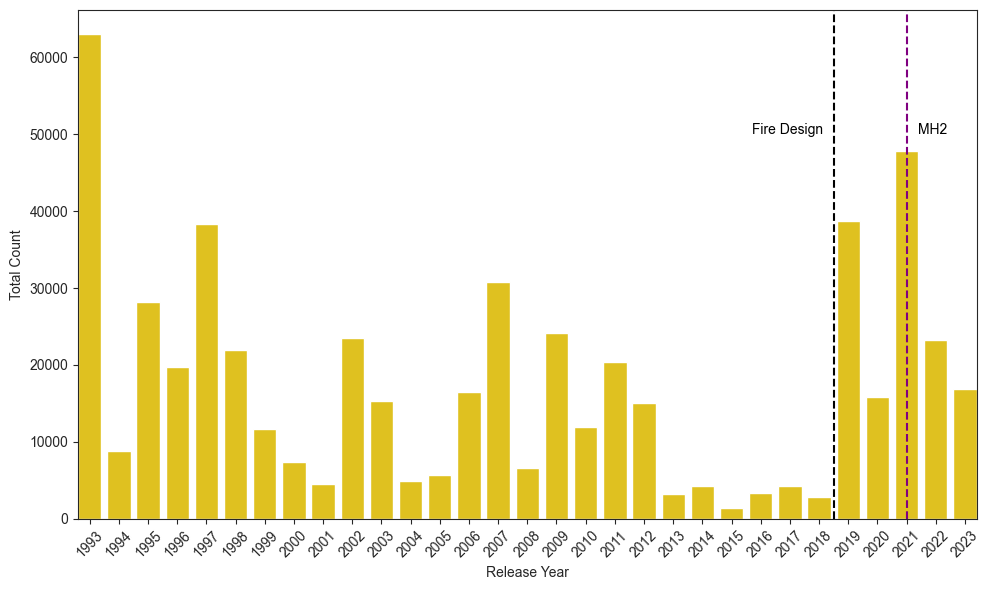

In [45]:
plt = ptd.create_base_graph(legacy_card_counts_df, (255/255, 215/255, 0/255))
plt.axvline(x=25.5, color='black', linestyle='--')
plt.text(22.7, 50000, 'Fire Design', color = 'black', fontsize = 10)
plt.axvline(x=28, color='purple', linestyle='--')
plt.text(28.4, 50000, 'MH2', color = 'black', fontsize = 10)
plt.show()